In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

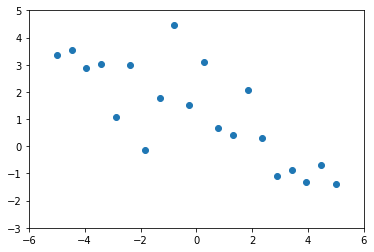

In [2]:
N = 20
X = np.zeros((2, N)) # D x N
X[0, :] = np.linspace(-5, 5, 20)
X[1, :] = -0.5 * X[0, :]  + 1 + np.random.normal(0, 1, N)
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :])
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 5)
plt.show()

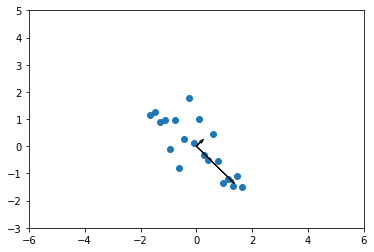

In [3]:
X_mean = X.mean(1).reshape(-1, 1)
X_std = X.std(1).reshape(-1, 1)
X_bar = (X - X_mean) / X_std
S = 1/N * np.matmul(X_bar, X_bar.T)
eigvals, eigvecs = np.linalg.eig(S)
fig, ax = plt.subplots()
ax.scatter(X_bar[0, :], X_bar[1, :])
for i in range(len(eigvals)):
    ax.arrow(0, 0, eigvals[i]*eigvecs[0, i], eigvals[i]*eigvecs[1, i], width=0.01, head_width=0.1)
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 5)
plt.show()

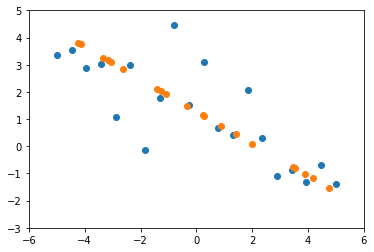

In [5]:
prin_com = eigvals.argmax()
B = eigvecs[:, prin_com].reshape(-1, 1)
z = np.matmul(B.T, X_bar)
X_bar_proj = np.matmul(B, z)
X_proj = X_bar_proj * X_std + X_mean
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :])
ax.scatter(X_proj[0, :], X_proj[1, :])
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 5)
plt.show()

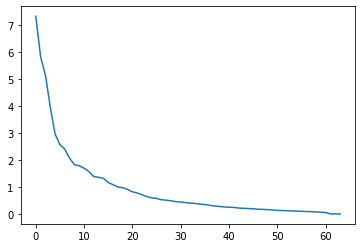

In [6]:
(data, target) = load_digits(return_X_y=True)
data = data.T
data_mean = data.mean(1).reshape(-1, 1)
data_std = data.std(1).reshape(-1, 1)
data_bar = (data - data_mean) / (data_std + 1e-10)
cov = 1/data.shape[1] * np.matmul(data_bar, data_bar.T)
evals, evecs = np.linalg.eig(cov)
evecs = np.flip(evecs[:, np.argsort(evals)])
evals = np.flip(np.sort(evals))
fig, ax = plt.subplots()
ax.plot(evals)

(-2.5, 2.5)

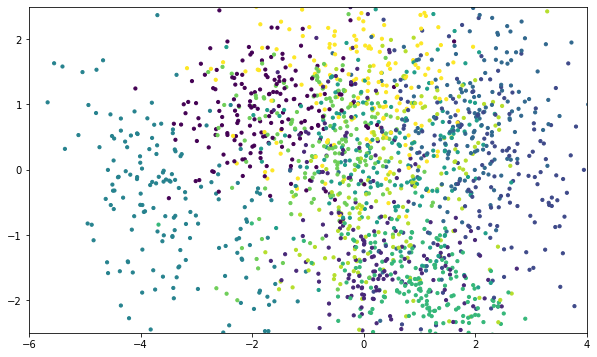

In [81]:
B_2pc = evecs[:, :2]
data_2d = np.matmul(B_2pc.T, data_bar)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_2d[0, :], data_2d[1, :], s=10, c=target)
ax.set_xlim(-6, 4)
ax.set_ylim(-2.5, 2.5)